## Trying to extract data from csv

In [142]:
#Imports
import requests
import json
import pandas as pd

In [143]:
# Create parameterized url
dicAUS = {}
dicMON = {}
dicItaly = {}
for i in range(2009,2020):
    #had to do alot of if statements here because not all races happen at the same round every year, so i had to do a bit of research
    if i == 2010:
        request_urlAUS = (f"http://ergast.com/api/f1/{i}/2/qualifying.json")
    else:
        request_urlAUS = (f"http://ergast.com/api/f1/{i}/1/qualifying.json")
    request_urlMON = (f"http://ergast.com/api/f1/{i}/6/qualifying.json")
    if i == 2014 or i == 2017 or i == 2012 or i == 2011 or i == 2009:
        request_urlItaly = (f"http://ergast.com/api/f1/{i}/13/qualifying.json")
    elif i == 2015 or i == 2013:
        request_urlItaly = (f"http://ergast.com/api/f1/{i}/12/qualifying.json")
    else:
        request_urlItaly = (f"http://ergast.com/api/f1/{i}/14/qualifying.json")

# Submit request and format output
    response_dataAUS = requests.get(request_urlAUS).json()
    response_dataMON = requests.get(request_urlMON).json()
    response_dataItaly = requests.get(request_urlItaly).json()


# Select fact
    qualiDataAUS = response_dataAUS["MRData"]["RaceTable"]["Races"][0]["QualifyingResults"][0]['Q3']
    dicAUS[f'{i}'] = (qualiDataAUS)
    qualiDataMON = response_dataMON["MRData"]["RaceTable"]["Races"][0]["QualifyingResults"][0]['Q3']
    dicMON[f'{i}'] = (qualiDataMON)
    qualiDataItaly = response_dataItaly["MRData"]["RaceTable"]["Races"][0]["QualifyingResults"][0]['Q3']
    dicItaly[f'{i}'] = (qualiDataItaly)
# qualiDf = pd.DataFrame.from_records(qualiData)
# qualiDf

In [144]:
print(dicAUS)
print(dicMON)
# 2017 monza was a rainy day
print(dicItaly)

{'2009': '1:26.202', '2010': '1:23.919', '2011': '1:23.529', '2012': '1:24.922', '2013': '1:27.407', '2014': '1:44.231', '2015': '1:26.327', '2016': '1:23.837', '2017': '1:22.188', '2018': '1:21.164', '2019': '1:20.486'}
{'2009': '1:14.902', '2010': '1:13.826', '2011': '1:13.556', '2012': '1:14.301', '2013': '1:13.876', '2014': '1:15.989', '2015': '1:15.098', '2016': '1:13.622', '2017': '1:12.178', '2018': '1:10.810', '2019': '1:10.166'}
{'2009': '1:24.066', '2010': '1:21.962', '2011': '1:22.275', '2012': '1:24.010', '2013': '1:23.755', '2014': '1:24.109', '2015': '1:23.397', '2016': '1:21.135', '2017': '1:35.554', '2018': '1:19.119', '2019': '1:19.307'}


In [145]:
dicAll = {}
for i in range(2009,2020):
    dicAll[f"{i}"] = [dicAUS[f"{i}"],dicMON[f"{i}"],dicItaly[f"{i}"]]
print(dicAll)
    

{'2009': ['1:26.202', '1:14.902', '1:24.066'], '2010': ['1:23.919', '1:13.826', '1:21.962'], '2011': ['1:23.529', '1:13.556', '1:22.275'], '2012': ['1:24.922', '1:14.301', '1:24.010'], '2013': ['1:27.407', '1:13.876', '1:23.755'], '2014': ['1:44.231', '1:15.989', '1:24.109'], '2015': ['1:26.327', '1:15.098', '1:23.397'], '2016': ['1:23.837', '1:13.622', '1:21.135'], '2017': ['1:22.188', '1:12.178', '1:35.554'], '2018': ['1:21.164', '1:10.810', '1:19.119'], '2019': ['1:20.486', '1:10.166', '1:19.307']}


In [146]:
dfAll = pd.DataFrame.from_dict(dicAll, orient='index')
dfAll

,0,1,2
2009,1:26.202,1:14.902,1:24.066
2010,1:23.919,1:13.826,1:21.962
2011,1:23.529,1:13.556,1:22.275
2012,1:24.922,1:14.301,1:24.010
2013,1:27.407,1:13.876,1:23.755
2014,1:44.231,1:15.989,1:24.109
2015,1:26.327,1:15.098,1:23.397
2016,1:23.837,1:13.622,1:21.135
2017,1:22.188,1:12.178,1:35.554
2018,1:21.164,1:10.810,1:19.119


In [147]:
dfAll.columns = ['Australia','Monoco','Monza']
dfAll

,Australia,Monoco,Monza
2009,1:26.202,1:14.902,1:24.066
2010,1:23.919,1:13.826,1:21.962
2011,1:23.529,1:13.556,1:22.275
2012,1:24.922,1:14.301,1:24.010
2013,1:27.407,1:13.876,1:23.755
2014,1:44.231,1:15.989,1:24.109
2015,1:26.327,1:15.098,1:23.397
2016,1:23.837,1:13.622,1:21.135
2017,1:22.188,1:12.178,1:35.554
2018,1:21.164,1:10.810,1:19.119


In [148]:
type(dfAll['Australia'][0])

str

In [149]:
def time_to_seconds(time_str):
    return float(time_str.replace("1:",""))
dfAll['Australia Seconds'] = dfAll['Australia'].apply(time_to_seconds) + 60
dfAll['Monoco Seconds'] = dfAll['Monoco'].apply(time_to_seconds) + 60
dfAll['Monza Seconds'] = dfAll['Monza'].apply(time_to_seconds) + 60
dfAll

,Australia,Monoco,Monza,Australia Seconds,Monoco Seconds,Monza Seconds
2009,1:26.202,1:14.902,1:24.066,86.202,74.902,84.066
2010,1:23.919,1:13.826,1:21.962,83.919,73.826,81.962
2011,1:23.529,1:13.556,1:22.275,83.529,73.556,82.275
2012,1:24.922,1:14.301,1:24.010,84.922,74.301,84.010
2013,1:27.407,1:13.876,1:23.755,87.407,73.876,83.755
2014,1:44.231,1:15.989,1:24.109,104.231,75.989,84.109
2015,1:26.327,1:15.098,1:23.397,86.327,75.098,83.397
2016,1:23.837,1:13.622,1:21.135,83.837,73.622,81.135
2017,1:22.188,1:12.178,1:35.554,82.188,72.178,95.554
2018,1:21.164,1:10.810,1:19.119,81.164,70.810,79.119


In [158]:
dfAll.index.name = 'year'
f1_seconds = dfAll.drop(['Australia', 'Monoco', 'Monza'], axis=1).copy()
f1_seconds = f1_seconds.reset_index().copy()
#dfAll.plot.scatter(x = 'year', y = 'Australia Seconds')
f1_seconds


,year,Australia Seconds,Monoco Seconds,Monza Seconds
0,2009,86.202,74.902,84.066
1,2010,83.919,73.826,81.962
2,2011,83.529,73.556,82.275
3,2012,84.922,74.301,84.010
4,2013,87.407,73.876,83.755
5,2014,104.231,75.989,84.109
6,2015,86.327,75.098,83.397
7,2016,83.837,73.622,81.135
8,2017,82.188,72.178,95.554
9,2018,81.164,70.810,79.119


In [153]:
import plotly.express as px
f1_seconds.head()

f1_seconds['Albert Park Pct Change'] = f1_seconds['Australia Seconds'].pct_change()
f1_seconds['Monoco Pct Change'] = f1_seconds['Monoco Seconds'].pct_change()
f1_seconds['Monza Pct Change'] = f1_seconds['Monza Seconds'].pct_change()
f1_pct_change = f1_seconds.drop(['Australia Seconds', 'Monoco Seconds','Monza Seconds'], axis=1).copy()
f1_pct_change = f1_pct_change.dropna()
f1_pct_change.loc[8, 'Monza Pct Change'] = -0.019614 
f1_pct_change.loc[5, 'Albert Park Pct Change'] = 0.019247
f1_pct_change['mean'] = f1_pct_change.mean(axis=1)
f1_pct_change

/Users/tarikthomas/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,year,Albert Park Pct Change,Monoco Pct Change,Monza Pct Change,mean
1,2010,-0.026484,-0.014365,-0.025028,-0.021959
2,2011,-0.004647,-0.003657,0.003819,-0.001495
3,2012,0.016677,0.010128,0.021088,0.015964
4,2013,0.029262,-0.005720,-0.003035,0.006836
5,2014,0.019247,0.028602,0.004227,0.017359
6,2015,-0.171772,-0.011725,-0.008465,-0.063988
7,2016,-0.028844,-0.019654,-0.027123,-0.025207
8,2017,-0.019669,-0.019614,-0.019614,-0.019632
9,2018,-0.012459,-0.018953,-0.171997,-0.067803
10,2019,-0.008353,-0.009095,0.002376,-0.005024


In [155]:
f1_quali = f1_seconds.copy()
f1_quali.loc[5, 'Australia Seconds'] = 90.934
f1_quali.loc[8, 'Monza Seconds'] = 83.221
f1_quali

,year,Australia Seconds,Monoco Seconds,Monza Seconds,Albert Park Pct Change,Monoco Pct Change,Monza Pct Change
0,2009,86.202,74.902,84.066,NaN,NaN,NaN
1,2010,83.919,73.826,81.962,-0.026484,-0.014365,-0.025028
2,2011,83.529,73.556,82.275,-0.004647,-0.003657,0.003819
3,2012,84.922,74.301,84.010,0.016677,0.010128,0.021088
4,2013,87.407,73.876,83.755,0.029262,-0.005720,-0.003035
5,2014,90.934,75.989,84.109,0.192479,0.028602,0.004227
6,2015,86.327,75.098,83.397,-0.171772,-0.011725,-0.008465
7,2016,83.837,73.622,81.135,-0.028844,-0.019654,-0.027123
8,2017,82.188,72.178,83.221,-0.019669,-0.019614,0.177716
9,2018,81.164,70.810,79.119,-0.012459,-0.018953,-0.171997


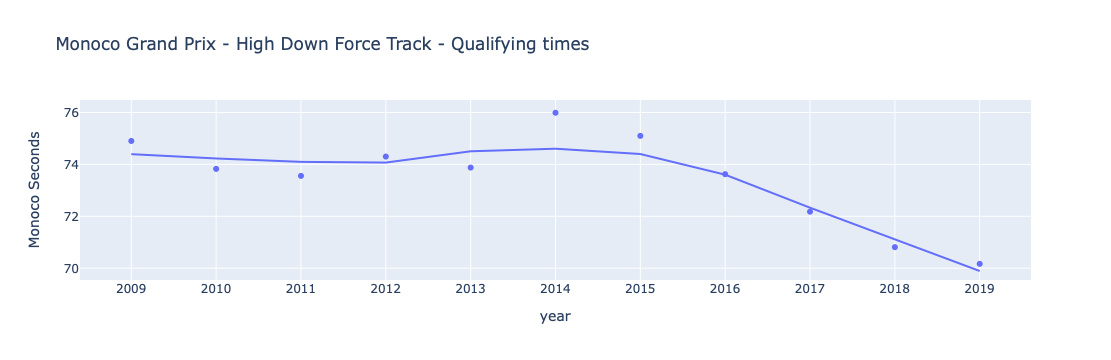

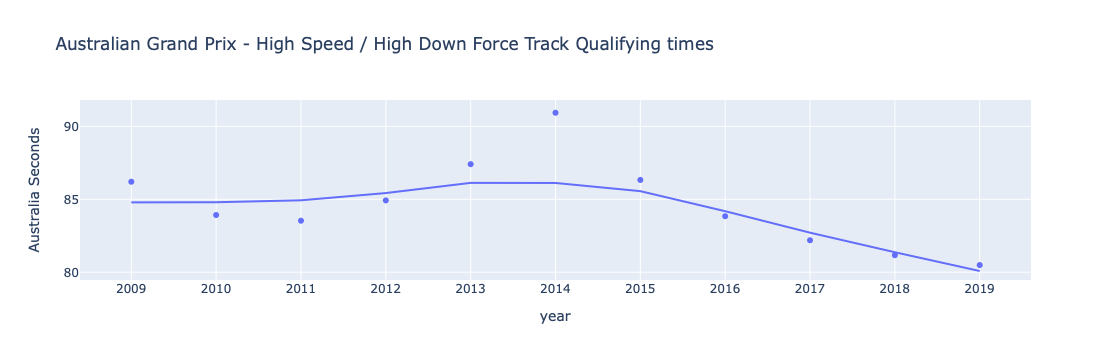

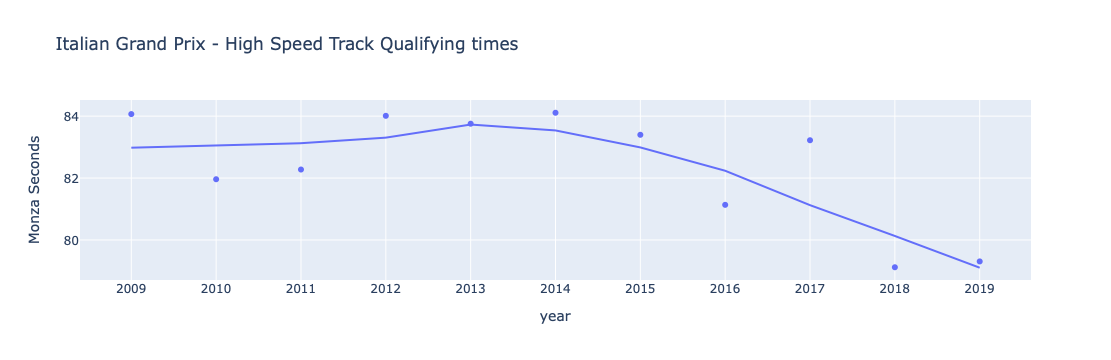

In [168]:
figMonoco = px.scatter(f1_quali, x="year", y="Monoco Seconds", trendline="lowess",title = "Monoco Grand Prix - High Down Force Track - Qualifying times")
figMonoco.show()
figAus = px.scatter(f1_quali, x="year", y="Australia Seconds", trendline="lowess", title = "Australian Grand Prix - High Speed / High Down Force Track Qualifying times") #, trendline_scope="overall")
figAus.show()
figMonz = px.scatter(f1_quali, x="year", y="Monza Seconds", trendline="lowess", title = "Italian Grand Prix - High Speed Track Qualifying times")
figMonz.show()

So this is a scatter plot of the the qualifying times of each year at 3 specific tracks. I have chosen these 3 specific tracks as they each
represent 3 different types of tracks, Monoco - a track with alot of corners requiring good aerodynamics, Monza -  a track with not many corners with long straights,
requiring high speed and Albert Park - a mix of both high downforce and high speed

from the scatter plot we can see that the most improvement has been made on the high downforce tracks with the Monoco time improving by 4.7 seconds and the effects of the improvement of downforce can also be seen in the Australian Grand Prix.

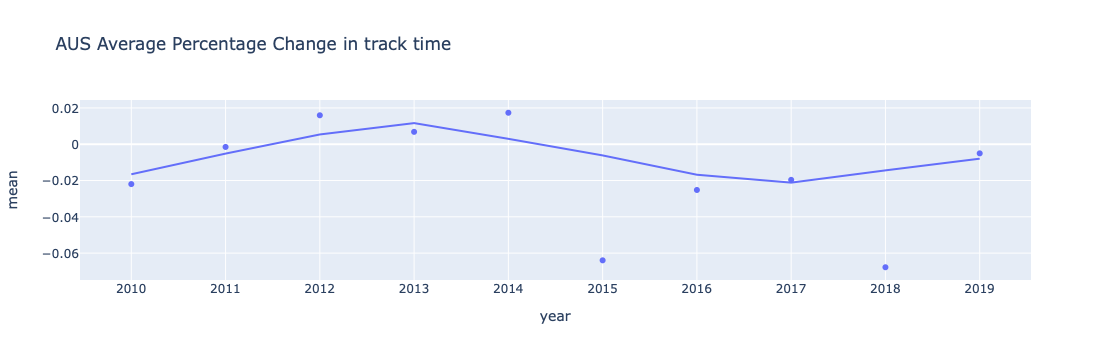

In [169]:
# fig_pct_change = px.scatter(f1_pct_change, x="year", y="mean", trendline="lowess", title = "Average Percentage Change in track time")#, color='country')
# fig_pct_change.show()
fig_pct_changeAus = px.scatter(f1_pct_change, x="year", y="mean",trendline="lowess", title = "AUS Average Percentage Change in track time")#, color='country')
fig_pct_changeAus.show()

This is a scatter plot that shows the percentage change over time, as you can see there are peaks at 2013 and 2019 this can be attributed to the fact that these were the years before big regulation changes, as teams prepare for new regulation they will focus their money and resources into future sessions instead of focusing on the current season, therefore there is a drop in performance during these years.